## Final Project Submission

Please fill out:
* Student name: Justin Grisanti
* Student pace: self paced
* Scheduled project review date/time: 8/20/2021 at 5:30 pm
* Instructor name: Jeff Herman
* Blog post URL: TBD


# Section 1: Business Understanding

The purpose of this section is to understand what the business problem and the stakeholders that will be understanding the work that I am performing. The stakeholder of my project is a real-estate consulting start-up that tries to help clients increase the value of their home. 
The main purpose of this algorithm is predictive, meaning that the model should be able to take in attributes of houses, and to predict a price associated with it.

The secondary purpose of this algorithm is inferential, meaning that the model should reveal something about the relationship between the attributes of a housing attributes and its price. I will apply my knowledge of statistics to include appropriate dialogue about these relationships. This could help home-owners take the necessary steps to modify their home to maximize a potential return.


# Section 2: Data Understanding

Based on what I see below, I understand the following about the data. First, it comes from Kings County, Washington, based on what I can see from latitude and longitude. Second, it includes several items related to housing information, including beds and baths, lot size, and condition/grade. This data is useful because it has many attributes that can impact the target variable. In this case, I will be using price as my target variable and will use the other variables to predict price using regression.

In [1187]:
# To import relevant libraries

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn.preprocessing as sk

In [1188]:
kc_house = pd.read_csv("data/kc_house_data.csv")

Before splitting my data into test/train, I ran a histogram of price to further understand the data. As normality is an assumption of linear regression, it seems that there are outliers here that could be handled. I will only focus on houses with prices below $1.0M as this is where majority of the data lies.

In [1189]:
kc_house = kc_house[kc_house['price']<900000]

In [1190]:
kc_house = kc_house[kc_house['bedrooms']<10]

In [1191]:
kc_house = kc_house[kc_house['bathrooms']<5]

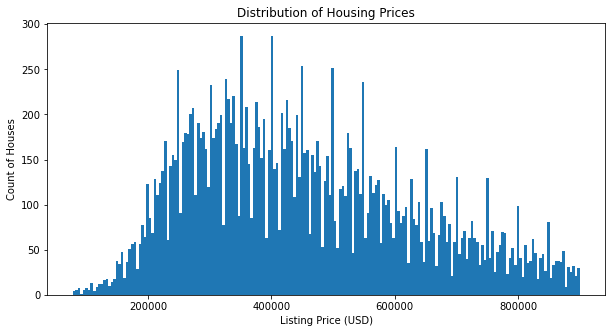

In [1192]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.hist(kc_house['price'], bins=200)
ax.ticklabel_format(useOffset=False, style='plain')
ax.set_xlabel("Listing Price (USD)")
ax.set_ylabel("Count of Houses")
ax.set_title("Distribution of Housing Prices");

Looking at the data below, there seems to be many rows of data. At first glance, every column seems to be relevant to the determination of price. I will run a correlation matrix below to determine which columns actually appear to impact price.

In [1193]:
x_kc = kc_house.drop("price", axis=1)
y_kc = kc_house["price"]

In [1194]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_kc, y_kc, random_state=42)

print(f"x_train is a DataFrame with {x_train.shape[0]} rows and {x_train.shape[1]} columns")
print(f"y_train is a Series with {x_train.shape[0]} values")

x_train is a DataFrame with 14631 rows and 20 columns
y_train is a Series with 14631 values


In [1195]:
x_train = x_train.copy()
x_test = x_test.copy()

In [1196]:
x_kc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19508 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             19508 non-null  int64  
 1   date           19508 non-null  object 
 2   bedrooms       19508 non-null  int64  
 3   bathrooms      19508 non-null  float64
 4   sqft_living    19508 non-null  int64  
 5   sqft_lot       19508 non-null  int64  
 6   floors         19508 non-null  float64
 7   waterfront     17348 non-null  float64
 8   view           19451 non-null  float64
 9   condition      19508 non-null  int64  
 10  grade          19508 non-null  int64  
 11  sqft_above     19508 non-null  int64  
 12  sqft_basement  19508 non-null  object 
 13  yr_built       19508 non-null  int64  
 14  yr_renovated   16034 non-null  float64
 15  zipcode        19508 non-null  int64  
 16  lat            19508 non-null  float64
 17  long           19508 non-null  float64
 18  sqft_l

In [1197]:
x_train.describe()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.463100e+04,14631.000000,14631.000000,14631.00000,1.463100e+04,14631.000000,12974.000000,14590.000000,14631.000000,14631.000000,14631.000000,14631.000000,12037.000000,14631.000000,14631.000000,14631.000000,14631.000000,14631.000000
mean,4.611547e+09,3.301278,2.012268,1916.80432,1.438061e+04,1.461896,0.002081,0.147293,3.405441,7.455745,1662.888866,1970.731529,68.933206,98078.829267,47.554681,-122.212437,1881.846900,12363.598045
std,2.880525e+09,0.874878,0.683885,723.37605,3.893381e+04,0.535545,0.045573,0.584516,0.648091,0.974069,683.720642,29.041516,364.365718,53.182488,0.143263,0.142421,578.737183,26103.340293
min,1.000102e+06,1.000000,0.500000,370.00000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.159300,-122.515000,399.000000,660.000000
25%,2.141315e+09,3.000000,1.500000,1370.00000,5.000000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1160.000000,1951.000000,0.000000,98033.000000,47.452800,-122.329000,1450.000000,5040.000000
50%,3.905101e+09,3.000000,2.000000,1820.00000,7.490000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1480.000000,1974.000000,0.000000,98065.000000,47.563800,-122.232000,1770.000000,7508.000000
75%,7.349625e+09,4.000000,2.500000,2360.00000,1.015800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2040.000000,1995.000000,0.000000,98118.000000,47.682000,-122.121000,2230.000000,9754.500000
max,9.900000e+09,9.000000,4.750000,5480.00000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,12.000000,5450.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,4670.000000,560617.000000


Next, I ran a histogram of price to further understand the data. As normality is an assumption of linear regression, it seems that there are outliers here that could be handled. I will only focus on houses with prices below $1.2M as this is where majority of the data lies.

# Section 3: Data Preparation

Next step is to prepare/clean the data to ensure that nothing is causing any blockers for my model. I will take a look at the value counts to see if there are any errors at first glance.

In [1198]:
for col in x_train:
    print(col, '\n', x_train[col].value_counts(normalize=True), '\n\n')

id 
 6300000226    0.000137
2561340020    0.000137
641900050     0.000137
6021501535    0.000137
8651402750    0.000137
                ...   
9407001320    0.000068
1853080850    0.000068
4083301645    0.000068
5560000650    0.000068
1777500160    0.000068
Name: id, Length: 14530, dtype: float64 


date 
 6/23/2014     0.007245
3/25/2015     0.006220
6/25/2014     0.006151
7/16/2014     0.006083
7/8/2014      0.005946
                ...   
12/27/2014    0.000068
8/30/2014     0.000068
5/24/2015     0.000068
1/17/2015     0.000068
5/10/2015     0.000068
Name: date, Length: 365, dtype: float64 


bedrooms 
 3    0.477479
4    0.297656
2    0.140865
5    0.061855
6    0.010594
1    0.009637
7    0.001367
8    0.000478
9    0.000068
Name: bedrooms, dtype: float64 


bathrooms 
 2.50    0.255075
1.00    0.196637
1.75    0.153851
2.00    0.095619
2.25    0.095140
1.50    0.072381
2.75    0.050031
3.00    0.031303
3.50    0.021051
3.25    0.016882
0.75    0.003827
3.75    0.002597
4.00    0

There is a fair mix of categorical and quantitative variables. I will start by analyzing the following categorical variables: date, bedrooms, bathrooms, floors, waterfront, view, condition, grade, yr_built, yr_renovated and zip code. 

Floors, watefront, view, condition, and grade seem to be fine at first glance. Bedrooms has some data that have a crazy amount of bedrooms, so I will look at the price to determine if those entries are typos or not. 

Date, yr_built, yr_renovated, and zip code have many entries so I will try to look into those deeper, as well.

In [1199]:
x_train[x_train['bedrooms'] > 7]

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15656,8141200080,8/14/2014,8,2.75,2530,4800,2.0,0.0,0.0,4,7,1390,1140.0,1901,NaN,98112,47.6241,-122.305,1540,4800
15056,7418000130,12/11/2014,8,3.25,4300,10441,2.0,0.0,0.0,4,8,2800,1500.0,1979,0.0,98059,47.4786,-122.131,1780,10457
19287,3756900027,11/25/2014,8,3.00,3840,15990,1.0,0.0,0.0,3,7,2530,1310.0,1961,0.0,98034,47.7111,-122.211,1380,8172
4092,1997200215,5/7/2014,9,4.50,3830,6988,2.5,0.0,0.0,3,7,2450,1380.0,1938,0.0,98103,47.6927,-122.338,1460,6291
12872,8813400155,12/19/2014,8,3.75,3460,4600,2.0,0.0,0.0,3,7,2860,600.0,1987,0.0,98105,47.6617,-122.289,2170,3750
4063,7226500100,2/19/2015,8,3.00,2850,12714,1.0,NaN,0.0,3,7,2850,0.0,1959,0.0,98055,47.4859,-122.205,1480,4942
6168,1873400020,7/3/2014,8,2.75,2790,6695,1.0,NaN,0.0,3,7,1470,1320.0,1977,NaN,98133,47.7565,-122.331,1760,7624
9068,6746700615,3/18/2015,8,2.50,2280,3000,1.5,0.0,0.0,3,7,1210,1070.0,1911,0.0,98105,47.6675,-122.316,1610,3000


This bedroom data seems reasonable with the amount of sqft associated with it. I will now check the remaining date and zip code columns.

In [1200]:
x_train['yr_built'].value_counts().to_dict()

{2014: 328,
 2005: 317,
 1977: 304,
 2004: 294,
 2006: 293,
 2003: 280,
 2007: 278,
 1978: 276,
 1979: 259,
 1968: 255,
 1967: 249,
 1959: 231,
 2008: 223,
 1954: 218,
 1990: 209,
 1987: 206,
 1962: 205,
 1976: 198,
 1989: 196,
 1969: 196,
 1966: 186,
 2001: 182,
 1947: 182,
 1955: 182,
 1994: 182,
 1960: 178,
 1963: 171,
 1988: 171,
 1948: 167,
 1985: 167,
 1980: 166,
 2009: 165,
 1999: 165,
 1942: 161,
 1951: 159,
 1950: 159,
 1958: 158,
 1998: 157,
 1961: 156,
 1991: 156,
 1984: 154,
 1952: 147,
 1992: 145,
 1986: 144,
 1949: 143,
 1957: 139,
 1953: 138,
 1981: 138,
 2002: 138,
 1993: 136,
 1975: 136,
 1983: 135,
 1956: 130,
 1996: 129,
 1943: 128,
 1965: 123,
 1926: 123,
 2000: 123,
 2013: 122,
 2012: 120,
 1964: 119,
 1997: 118,
 1941: 113,
 1940: 110,
 2010: 110,
 1995: 109,
 1974: 107,
 1925: 106,
 1972: 103,
 1944: 100,
 1924: 97,
 1946: 93,
 1973: 93,
 2011: 91,
 1918: 87,
 1970: 86,
 1927: 82,
 1929: 81,
 1910: 81,
 1920: 75,
 1928: 73,
 1939: 73,
 1971: 71,
 1945: 67,
 1982:

In [1201]:
x_train['yr_renovated'].value_counts().to_dict()

{0.0: 11621,
 2014.0: 42,
 2013.0: 23,
 2007.0: 14,
 2005.0: 13,
 2003.0: 13,
 1986.0: 12,
 1989.0: 12,
 2000.0: 12,
 1990.0: 11,
 2009.0: 11,
 2006.0: 10,
 1987.0: 10,
 2004.0: 10,
 1983.0: 10,
 2002.0: 9,
 1984.0: 9,
 1998.0: 9,
 1994.0: 9,
 2015.0: 9,
 1985.0: 8,
 2001.0: 8,
 2008.0: 7,
 1997.0: 7,
 1999.0: 7,
 1988.0: 7,
 1970.0: 6,
 1980.0: 6,
 1982.0: 6,
 2011.0: 6,
 1996.0: 6,
 1995.0: 6,
 2010.0: 5,
 1992.0: 5,
 1991.0: 5,
 1977.0: 5,
 2012.0: 5,
 1964.0: 5,
 1968.0: 4,
 1993.0: 4,
 1979.0: 4,
 1978.0: 3,
 1981.0: 3,
 1960.0: 3,
 1969.0: 3,
 1972.0: 3,
 1963.0: 3,
 1975.0: 3,
 1973.0: 3,
 1945.0: 3,
 1940.0: 2,
 1958.0: 2,
 1962.0: 2,
 1955.0: 2,
 1965.0: 2,
 1971.0: 1,
 1946.0: 1,
 1974.0: 1,
 1967.0: 1,
 1959.0: 1,
 1957.0: 1,
 1934.0: 1,
 1948.0: 1,
 1944.0: 1}

In [1202]:
x_train['zipcode'].value_counts().to_dict()

{98038: 446,
 98042: 426,
 98103: 418,
 98115: 402,
 98052: 398,
 98117: 396,
 98034: 391,
 98118: 371,
 98133: 356,
 98023: 356,
 98058: 347,
 98155: 335,
 98059: 321,
 98056: 305,
 98074: 297,
 98125: 295,
 98053: 282,
 98027: 272,
 98001: 269,
 98092: 268,
 98126: 262,
 98106: 248,
 98006: 240,
 98033: 238,
 98029: 222,
 98144: 219,
 98065: 214,
 98031: 213,
 98168: 212,
 98075: 211,
 98116: 208,
 98003: 207,
 98055: 207,
 98146: 205,
 98028: 205,
 98198: 202,
 98072: 199,
 98178: 198,
 98008: 195,
 98107: 189,
 98022: 185,
 98122: 183,
 98030: 182,
 98136: 178,
 98199: 175,
 98166: 170,
 98177: 162,
 98045: 157,
 98011: 149,
 98019: 145,
 98077: 140,
 98002: 140,
 98108: 135,
 98105: 124,
 98188: 103,
 98112: 102,
 98119: 99,
 98007: 96,
 98032: 90,
 98014: 87,
 98005: 87,
 98070: 82,
 98040: 74,
 98010: 73,
 98004: 68,
 98024: 53,
 98102: 52,
 98109: 49,
 98148: 43,
 98039: 3}

I will now review the quantitative values for any outliers or weird data.

In [1203]:
kc_house_quant = x_train
kc_house_quant = kc_house_quant.drop(columns = ['id','date','lat','long','bedrooms','bathrooms','floors','waterfront','view','condition','grade','yr_built','yr_renovated','zipcode','date'])

array([[<AxesSubplot:title={'center':'sqft_living'}>,
        <AxesSubplot:title={'center':'sqft_lot'}>],
       [<AxesSubplot:title={'center':'sqft_above'}>,
        <AxesSubplot:title={'center':'sqft_living15'}>],
       [<AxesSubplot:title={'center':'sqft_lot15'}>, <AxesSubplot:>]],
      dtype=object)

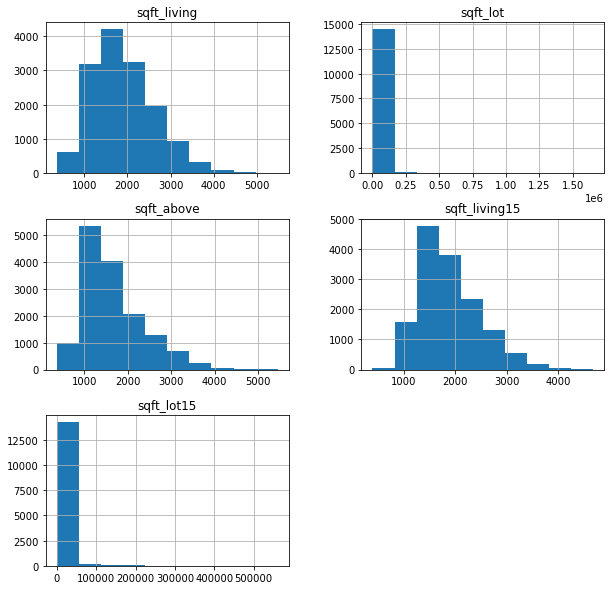

In [1204]:
kc_house_quant.hist(figsize=(10,10))

In [1205]:
x_train.isna().any()

id               False
date             False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront        True
view              True
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated      True
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

In [1206]:
x_train[x_train['waterfront'].isna()]

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1732,913000340,1/2/2015,1,1.00,680,1638,1.0,NaN,4.0,1,6,680,0.0,1910,1992.0,98116,47.5832,-122.399,1010,3621
12998,293610040,2/10/2015,4,2.75,2950,5803,2.0,NaN,0.0,3,9,2950,0.0,2007,0.0,98028,47.7368,-122.231,2940,5803
3421,3179101050,8/4/2014,2,1.75,1600,5795,1.5,NaN,0.0,3,8,1600,0.0,1940,NaN,98105,47.6709,-122.276,2310,6301
13681,6817800730,1/8/2015,2,1.50,1280,11071,1.0,NaN,0.0,3,7,850,430.0,1984,0.0,98074,47.6351,-122.033,1280,10879
18599,993002225,6/23/2014,3,2.25,1520,1245,3.0,NaN,0.0,3,8,1520,0.0,2004,0.0,98103,47.6907,-122.340,1520,1470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18134,7852020760,11/1/2014,3,2.50,1740,3690,2.0,NaN,0.0,3,8,1740,0.0,2000,0.0,98065,47.5345,-121.867,2100,4944
179,9158100075,1/7/2015,2,1.00,1350,8220,1.0,NaN,0.0,3,7,1060,290.0,1949,0.0,98177,47.7224,-122.358,1540,8280
7587,203900690,12/23/2014,4,2.00,1980,15354,1.0,NaN,0.0,3,7,1980,0.0,1977,0.0,98053,47.6380,-121.968,1420,12300
9688,4031000260,6/6/2014,2,1.00,1730,9610,1.0,NaN,0.0,3,7,1380,350.0,1962,0.0,98001,47.2956,-122.285,1310,9812


In [1207]:
waterfront = x_train[['waterfront']]

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = 'most_frequent')

imputer.fit(waterfront)

waterfront_imputed_train = imputer.transform(waterfront)

waterfront_imputed_train

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [1208]:
x_train['waterfront'] = waterfront_imputed_train

In [1209]:
view = x_train[['view']]

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = 'most_frequent')

imputer.fit(view)

view_imputed_train = imputer.transform(view)

view_imputed_train

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [1210]:
x_train['view'] = view_imputed_train

In [1211]:
x_train[x_train['yr_renovated'].isna()]

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1997,9346700320,3/23/2015,4,2.50,2460,9296,2.0,0.0,0.0,3,9,2460,0.0,1978,NaN,98007,47.6125,-122.152,2730,9900
7971,4310700665,3/5/2015,4,3.00,2200,4466,2.0,0.0,0.0,3,7,2200,0.0,1968,NaN,98103,47.7005,-122.339,1780,2250
17171,1523069022,5/6/2015,3,1.50,1630,82764,1.0,0.0,0.0,4,6,1630,0.0,1948,NaN,98027,47.4743,-122.026,1680,199069
3421,3179101050,8/4/2014,2,1.75,1600,5795,1.5,0.0,0.0,3,8,1600,0.0,1940,NaN,98105,47.6709,-122.276,2310,6301
9712,2568300045,3/19/2015,6,2.00,1900,8240,1.0,0.0,0.0,2,7,1200,700.0,1964,NaN,98125,47.7037,-122.296,1900,8240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4304,7853340490,6/17/2014,2,2.50,1620,3196,2.0,0.0,0.0,3,8,1620,0.0,2008,NaN,98065,47.5167,-121.878,1750,2828
9549,8732040820,10/17/2014,3,1.75,1820,8740,1.0,0.0,0.0,4,8,1820,0.0,1987,NaN,98023,47.3074,-122.385,2210,8320
7053,8944360170,11/14/2014,3,2.50,1810,4332,2.0,0.0,0.0,3,8,1810,0.0,1992,NaN,98029,47.5776,-121.996,1740,4332
19388,5561301220,6/10/2014,4,4.50,3870,35889,2.0,0.0,0.0,3,10,2530,1340.0,2001,NaN,98027,47.4677,-122.010,3020,35366


In [1212]:
renovated = x_train[['yr_renovated']]

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = 'most_frequent')

imputer.fit(renovated)

renovated_imputed_train = imputer.transform(renovated)

renovated_imputed_train

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [1213]:
x_train['yr_renovated'] = renovated_imputed_train

In [1214]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14631 entries, 11634 to 17418
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             14631 non-null  int64  
 1   date           14631 non-null  object 
 2   bedrooms       14631 non-null  int64  
 3   bathrooms      14631 non-null  float64
 4   sqft_living    14631 non-null  int64  
 5   sqft_lot       14631 non-null  int64  
 6   floors         14631 non-null  float64
 7   waterfront     14631 non-null  float64
 8   view           14631 non-null  float64
 9   condition      14631 non-null  int64  
 10  grade          14631 non-null  int64  
 11  sqft_above     14631 non-null  int64  
 12  sqft_basement  14631 non-null  object 
 13  yr_built       14631 non-null  int64  
 14  yr_renovated   14631 non-null  float64
 15  zipcode        14631 non-null  int64  
 16  lat            14631 non-null  float64
 17  long           14631 non-null  float64
 18  sq

In [1215]:
x_train['sqft_basement'] = x_train['sqft_basement'].replace('?', None)

In [1216]:
x_train[x_train['sqft_basement'].isna()]

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


In [1217]:
x_train['sqft_basement'].astype('float64')

11634    1420.0
8369        0.0
18349       0.0
1997        0.0
15899       0.0
          ...  
12435       0.0
13164     440.0
5954        0.0
953         0.0
17418       0.0
Name: sqft_basement, Length: 14631, dtype: float64

In [1218]:
basement = x_train[['sqft_basement']]

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = 'mean')

imputer.fit(basement)

basement_imputed_train = imputer.transform(basement)

basement_imputed_train

array([[1420.],
       [   0.],
       [   0.],
       ...,
       [   0.],
       [   0.],
       [   0.]])

In [1219]:
x_train['sqft_basement'] = basement_imputed_train

In [1220]:
x_train.isna().any()

id               False
date             False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

In [1221]:
mask = x_train.yr_renovated > 0
column_name = 'yr_renovated'
x_train.loc[mask, column_name] = 1

In [1222]:
x_train['yr_renovated'].value_counts()

0.0    14215
1.0      416
Name: yr_renovated, dtype: int64

In [1223]:
x_test

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
16224,3158500290,9/19/2014,4,2.50,2640,5595,2.0,0.0,0.0,3,8,2640,0.0,2011,0.0,98038,47.3551,-122.054,1840,5011
9009,267020090,8/18/2014,5,2.50,3110,15783,1.0,0.0,0.0,3,8,1720,1390.0,1974,0.0,98052,47.6301,-122.103,2550,12220
4542,7201800300,9/9/2014,3,1.75,1300,8480,1.0,0.0,0.0,3,7,1300,0.0,1969,0.0,98052,47.6991,-122.130,1740,7280
16951,4364700585,4/8/2015,3,1.75,2180,7318,1.0,0.0,0.0,4,7,1210,970.0,1967,NaN,98126,47.5251,-122.370,2140,7560
16248,2541100010,7/8/2014,4,2.50,2250,11370,2.0,0.0,0.0,3,8,2250,0.0,1991,0.0,98034,47.7115,-122.239,2190,9611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12129,5505700030,5/28/2014,3,2.00,1650,6150,2.0,0.0,0.0,4,7,1650,0.0,1926,1993.0,98116,47.5713,-122.394,1280,6150
8999,259601010,4/14/2015,3,1.00,1250,7200,1.0,0.0,0.0,3,7,1250,0.0,1964,0.0,98008,47.6342,-122.120,1430,7400
2742,619000045,9/22/2014,3,1.75,1410,15210,1.0,0.0,0.0,3,7,1410,0.0,1950,2014.0,98166,47.4181,-122.339,1970,16290
7483,6837700170,9/3/2014,2,1.00,1010,4050,1.0,0.0,0.0,3,7,1010,0.0,1950,NaN,98116,47.5838,-122.382,2310,5000


In [1224]:
x_test.isna().any()

id               False
date             False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront        True
view              True
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated      True
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

In [1225]:
x_test[x_test['waterfront'].isna()]

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
17185,88000591,4/14/2015,3,1.00,1000,9450,1.0,NaN,0.0,3,6,1000,?,1962,0.0,98055,47.4562,-122.193,1300,13500
6578,1330900250,5/15/2014,3,2.25,1980,40887,1.0,NaN,0.0,4,8,1980,0.0,1980,NaN,98052,47.6478,-122.029,2460,35700
7823,2568300266,5/30/2014,4,2.50,3190,11375,1.0,NaN,0.0,5,8,2210,980.0,1946,NaN,98125,47.7040,-122.300,1100,8500
11370,5530000030,1/26/2015,4,2.00,2130,9579,1.0,NaN,0.0,4,7,1250,880.0,1968,0.0,98001,47.3069,-122.271,1590,9800
9201,3420069055,12/3/2014,4,2.25,1570,499571,1.0,NaN,3.0,4,7,1570,0.0,1972,0.0,98022,47.1808,-122.023,1700,181708
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7964,3331500485,1/2/2015,2,1.00,800,5150,1.0,NaN,0.0,4,6,800,0.0,1949,0.0,98118,47.5525,-122.274,1280,5150
13946,9818700455,8/26/2014,4,2.50,2320,4000,1.5,NaN,0.0,5,8,1510,810.0,1905,0.0,98122,47.6048,-122.298,1490,4500
13495,1331900410,6/20/2014,4,3.00,3740,30884,2.0,NaN,0.0,3,9,3060,680.0,1988,0.0,98072,47.7505,-122.117,3240,37031
12290,7278700069,5/21/2014,4,2.50,2340,6420,1.0,NaN,2.0,3,8,1590,750.0,1964,0.0,98177,47.7728,-122.386,2110,10856


In [1226]:
waterfront2 = x_test[['waterfront']]

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = 'most_frequent')

imputer.fit(waterfront2)

waterfront2_imputed_train = imputer.transform(waterfront2)

waterfront2_imputed_train

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [1227]:
x_test['waterfront'] = waterfront2_imputed_train

In [1228]:
x_test[x_test['view'].isna()]

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
20380,1196003740,9/24/2014,5,4.25,4110,42755,2.0,0.0,NaN,3,10,2970,1140.0,2000,NaN,98023,47.3375,-122.337,2730,12750
129,7853210060,4/6/2015,4,2.50,2070,4310,2.0,0.0,NaN,3,7,2070,0.0,2004,0.0,98065,47.5319,-121.850,1970,3748
5196,8857600680,3/13/2015,5,1.50,1690,7725,1.5,0.0,NaN,4,7,1690,0.0,1961,0.0,98032,47.3859,-122.288,1690,7739
13729,1895450230,2/18/2015,3,2.50,2260,8120,2.0,0.0,NaN,3,8,2260,0.0,2004,0.0,98023,47.2924,-122.357,2250,7784
5207,4031000290,4/8/2015,3,1.00,1310,9554,1.0,0.0,NaN,3,7,960,350.0,1962,0.0,98001,47.2949,-122.285,1310,9845
7,2008000270,1/15/2015,3,1.50,1060,9711,1.0,0.0,NaN,3,7,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
114,8961960160,10/28/2014,4,2.50,3230,16171,2.0,0.0,NaN,3,9,2520,710.0,2001,0.0,98001,47.3183,-122.253,2640,8517
2415,8924100111,4/24/2015,2,1.50,1400,4050,1.0,0.0,NaN,4,8,1400,0.0,1954,0.0,98115,47.6768,-122.269,1900,5940
14975,8562740480,4/14/2015,4,3.25,3160,6327,2.0,0.0,NaN,3,9,2280,880.0,2004,0.0,98027,47.5360,-122.066,3160,5946
10339,6868200060,12/11/2014,3,2.25,2560,8040,1.0,0.0,NaN,3,8,1510,1050.0,1958,0.0,98125,47.7124,-122.303,1980,8040


In [1229]:
view2 = x_test[['view']]

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = 'most_frequent')

imputer.fit(view2)

view2_imputed_train = imputer.transform(view2)

view2_imputed_train

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [1230]:
x_test['view'] = view2_imputed_train

In [1231]:
x_test[x_test['yr_renovated'].isna()]

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
16951,4364700585,4/8/2015,3,1.75,2180,7318,1.0,0.0,0.0,4,7,1210,970.0,1967,NaN,98126,47.5251,-122.370,2140,7560
19525,1722800835,8/11/2014,2,1.00,770,2191,1.0,0.0,0.0,3,6,770,0.0,1937,NaN,98108,47.5512,-122.323,940,5000
784,686500030,12/2/2014,6,2.75,3610,10003,1.5,0.0,0.0,4,8,3610,0.0,1966,NaN,98008,47.6261,-122.125,2560,10004
6578,1330900250,5/15/2014,3,2.25,1980,40887,1.0,0.0,0.0,4,8,1980,0.0,1980,NaN,98052,47.6478,-122.029,2460,35700
7823,2568300266,5/30/2014,4,2.50,3190,11375,1.0,0.0,0.0,5,8,2210,980.0,1946,NaN,98125,47.7040,-122.300,1100,8500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7944,4022905172,9/26/2014,4,1.75,2270,27122,1.0,0.0,0.0,5,8,1300,970.0,1957,NaN,98155,47.7637,-122.281,2380,11822
6590,1854900470,9/24/2014,3,2.50,2890,7027,2.0,0.0,0.0,3,8,2890,0.0,2004,NaN,98074,47.6111,-122.009,2890,7197
20956,2222059052,2/27/2015,3,2.50,2529,9653,2.0,0.0,0.0,3,7,2529,0.0,2012,NaN,98042,47.3738,-122.161,2533,6125
7436,4222200380,8/5/2014,3,2.00,1710,7920,1.0,0.0,0.0,3,8,1260,450.0,1968,NaN,98003,47.3473,-122.305,1760,8120


In [1232]:
renovated2 = x_test[['yr_renovated']]

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = 'most_frequent')

imputer.fit(renovated2)

renovated2_imputed_train = imputer.transform(renovated2)

renovated2_imputed_train

array([[   0.],
       [   0.],
       [   0.],
       ...,
       [2014.],
       [   0.],
       [   0.]])

In [1233]:
x_test['yr_renovated'] = renovated2_imputed_train

In [1234]:
x_test.isna().any()

id               False
date             False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

In [1235]:
x_test[x_test['sqft_basement'] == '?']

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
17185,88000591,4/14/2015,3,1.00,1000,9450,1.0,0.0,0.0,3,6,1000,?,1962,0.0,98055,47.4562,-122.193,1300,13500
3134,170000215,3/24/2015,5,2.75,2720,4680,1.5,0.0,0.0,4,8,1710,?,1913,0.0,98107,47.6612,-122.363,1670,4800
7356,739800250,2/22/2015,3,2.25,1420,7297,1.0,0.0,0.0,3,7,1130,?,1984,0.0,98031,47.4046,-122.194,1730,7419
11000,1314300046,6/30/2014,3,1.00,1010,8800,1.0,0.0,0.0,4,7,1010,?,1954,0.0,98118,47.5483,-122.278,1400,4095
15347,7304300420,8/1/2014,4,2.50,1750,11381,1.0,0.0,0.0,4,7,1610,?,1947,0.0,98155,47.7425,-122.321,1080,11375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6414,5104531640,3/23/2015,4,3.00,3400,5100,2.0,0.0,0.0,3,9,3400,?,2006,0.0,98038,47.3548,-122.002,3400,5672
4317,8731990090,8/20/2014,4,2.75,2930,22000,1.0,0.0,3.0,4,9,1580,?,1978,0.0,98023,47.3227,-122.384,2930,9758
4776,411100020,11/17/2014,3,1.75,1140,8263,1.0,0.0,0.0,5,7,1140,?,1950,0.0,98155,47.7407,-122.327,1140,6770
18413,1868900775,5/5/2014,3,2.00,1800,5000,1.0,0.0,0.0,4,7,1080,?,1942,0.0,98115,47.6738,-122.297,1800,5000


In [1236]:
x_test['sqft_basement'] = x_test['sqft_basement'].replace('?', None)

In [1237]:
x_test[x_test['sqft_basement'].isna()]

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


In [1238]:
x_test['sqft_basement'].astype('float64')

16224       0.0
9009     1390.0
4542        0.0
16951     970.0
16248       0.0
          ...  
12129       0.0
8999        0.0
2742        0.0
7483        0.0
13769       0.0
Name: sqft_basement, Length: 4877, dtype: float64

In [1239]:
basement2 = x_test[['sqft_basement']]

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = 'mean')

imputer.fit(basement2)

basement2_imputed_train = imputer.transform(basement2)

basement2_imputed_train

array([[   0.],
       [1390.],
       [   0.],
       ...,
       [   0.],
       [   0.],
       [   0.]])

In [1240]:
x_test['sqft_basement'] = basement2_imputed_train

In [1241]:
mask = x_test.yr_renovated > 0
column_name = 'yr_renovated'
x_test.loc[mask, column_name] = 1

In [1242]:
x_test['yr_renovated'].value_counts()

0.0    4740
1.0     137
Name: yr_renovated, dtype: int64

In [1243]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14631 entries, 11634 to 17418
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             14631 non-null  int64  
 1   date           14631 non-null  object 
 2   bedrooms       14631 non-null  int64  
 3   bathrooms      14631 non-null  float64
 4   sqft_living    14631 non-null  int64  
 5   sqft_lot       14631 non-null  int64  
 6   floors         14631 non-null  float64
 7   waterfront     14631 non-null  float64
 8   view           14631 non-null  float64
 9   condition      14631 non-null  int64  
 10  grade          14631 non-null  int64  
 11  sqft_above     14631 non-null  int64  
 12  sqft_basement  14631 non-null  float64
 13  yr_built       14631 non-null  int64  
 14  yr_renovated   14631 non-null  float64
 15  zipcode        14631 non-null  int64  
 16  lat            14631 non-null  float64
 17  long           14631 non-null  float64
 18  sq

In [1244]:
x_train = x_train.drop(['id','date','view','yr_built','zipcode','lat','long'], axis = 1)
x_test = x_test.drop(['id','date', 'view','yr_built','zipcode','lat','long'], axis = 1)

In [1245]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.4446486511159702

Now that we have reviewed our data, we can begin to model.

# Section 4: Modeling

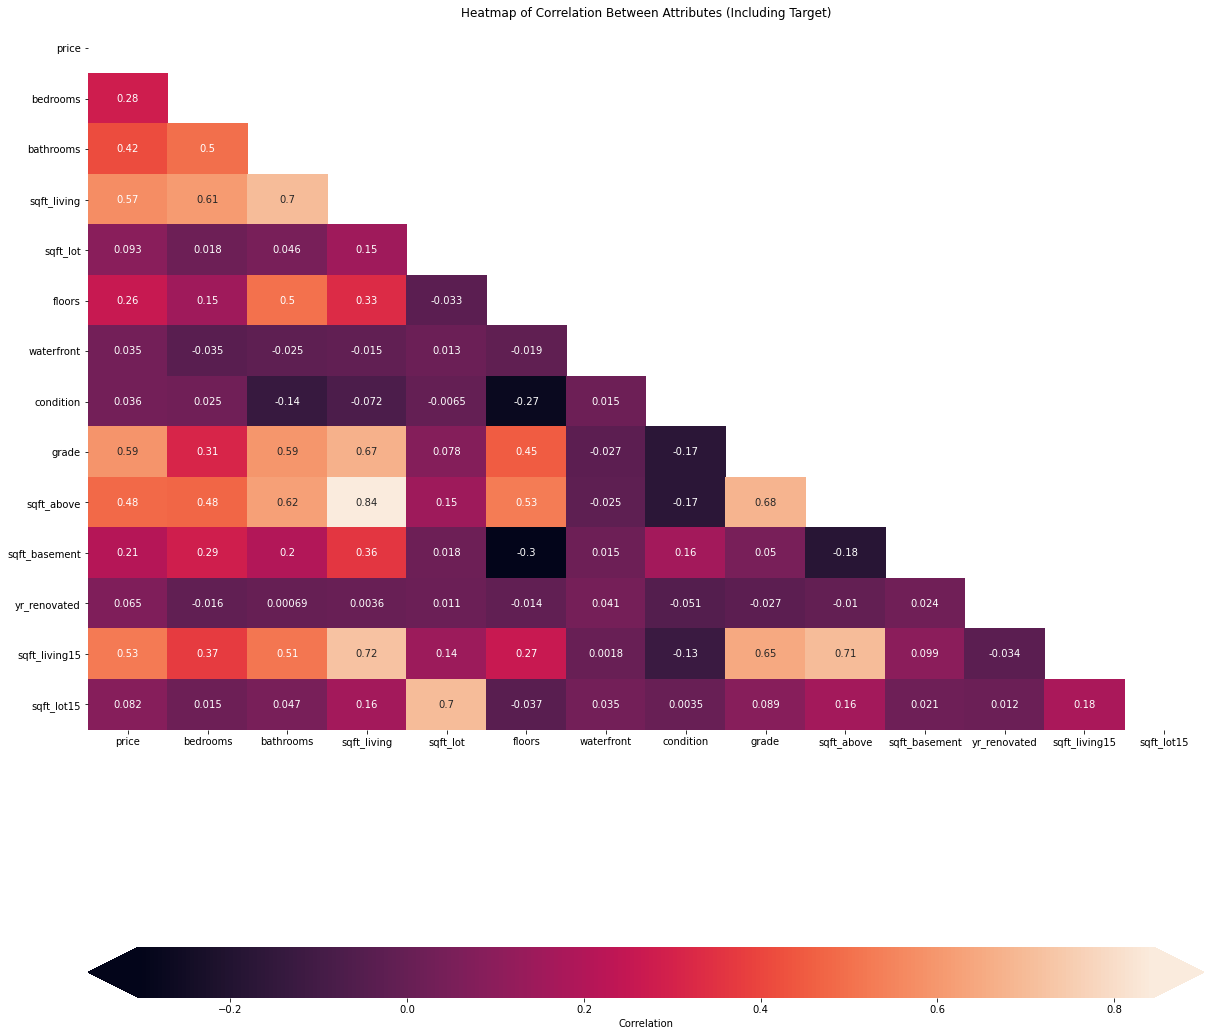

In [1246]:
x_kc = kc_house.drop("price", axis=1)
y_kc = kc_house["price"]

import seaborn as sns
import numpy as np

# Create a df with the target as the first column,
# then compute the correlation matrix
heatmap_data = pd.concat([y_train, x_train], axis=1)
corr = heatmap_data.corr()

# Set up figure and axes
fig, ax = plt.subplots(figsize=(20, 20))

# Plot a heatmap of the correlation matrix, with both
# numbers and colors indicating the correlations
sns.heatmap(
    # Specifies the data to be plotted
    data=corr,
    # The mask means we only show half the values,
    # instead of showing duplicates. It's optional.
    mask=np.triu(np.ones_like(corr, dtype=bool)),
    # Specifies that we should use the existing axes
    ax=ax,
    # Specifies that we want labels, not just colors
    annot=True,
    # Customizes colorbar appearance
    cbar_kws={"label": "Correlation", "orientation": "horizontal", "pad": .2, "extend": "both"}
)

# Customize the plot appearance
ax.set_title("Heatmap of Correlation Between Attributes (Including Target)");

Based on the correlation matrix above, it seems that sqft_living and grade are the most correlated with price. As the other sqft variables are correlated amongst themselves, I will exclude the rest and focus on grade and sqft_living. I will make two baseline models based on these two variables

In [1247]:
most_correlated = 'grade'
second_most_correlated = 'sqft_living'

Now that we have our baseline models, we can deal with multicollinearity of features between our categories.

In [1248]:
df=x_train.corr().abs().stack().reset_index().sort_values(0, ascending=False)

df['pairs'] = list(zip(df.level_0, df.level_1))

df.set_index(['pairs'], inplace = True)

df.drop(columns=['level_1', 'level_0'], inplace = True)

df.columns = ['cc']

df.drop_duplicates(inplace=True)

In [1249]:
df[(df.cc>.70) & (df.cc <1)]

,cc
pairs,
"(sqft_above, sqft_living)",0.844145
"(sqft_living15, sqft_living)",0.720715
"(sqft_above, sqft_living15)",0.705109
"(sqft_lot15, sqft_lot)",0.703536
"(bathrooms, sqft_living)",0.702298


As we can see above, a lot of the sqft columns have high correlation with each other. Because of this, I will remove all of them except for sqft_living.

In [1250]:
x_train = x_train.drop(['sqft_above','sqft_living15','sqft_lot','sqft_lot15'], axis = 1)

Now that multicollinearity has been dealt with, let's take a deeper look into our two variables that are most important.

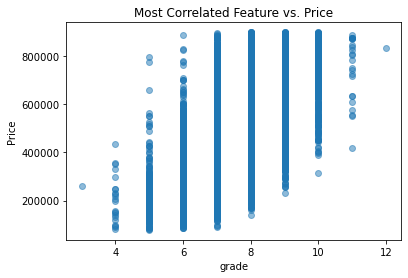

In [1251]:
fig, ax = plt.subplots()

ax.scatter(x_train[most_correlated], y_train, alpha=0.5)
ax.set_xlabel(most_correlated)
ax.set_ylabel("Price")
ax.set_title("Most Correlated Feature vs. Price");

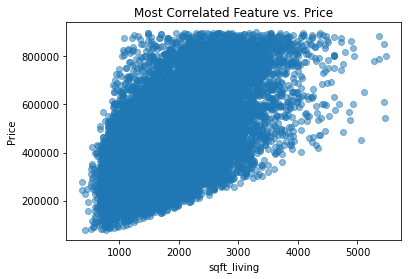

In [1252]:
fig, ax = plt.subplots()

ax.scatter(x_train[second_most_correlated], y_train, alpha=0.5)
ax.set_xlabel(second_most_correlated)
ax.set_ylabel("Price")
ax.set_title("Most Correlated Feature vs. Price");

### Baseline Model

In [1253]:
from sklearn.linear_model import LinearRegression
baseline_model1 = LinearRegression()
baseline_model2 = LinearRegression()

In [1254]:
from sklearn.model_selection import cross_validate, ShuffleSplit

splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=0)

baseline_scores = cross_validate(
    estimator=baseline_model1,
    X = x_train[[most_correlated]],
    y = y_train,
    return_train_score=True,
    cv=splitter
)

print("Grade Train score:     ", baseline_scores["train_score"].mean())
print("Grade Validation score:", baseline_scores["test_score"].mean())

Grade Train score:      0.348221922537774
Grade Validation score: 0.34725844789868754


In [1255]:
from sklearn.model_selection import cross_validate, ShuffleSplit

splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=0)

baseline_scores2 = cross_validate(
    estimator=baseline_model2,
    X = x_train[[second_most_correlated]],
    y = y_train,
    return_train_score=True,
    cv=splitter
)

print("Living Sqft Train score:     ", baseline_scores["train_score"].mean())
print("Living Sqft Validation score:", baseline_scores["test_score"].mean())

Living Sqft Train score:      0.348221922537774
Living Sqft Validation score: 0.34725844789868754


Now that we have our baseline models and an understanding of the data, let's begin to refine the models to try to get a better r^2.

### Model 2.0

The purpose of this model is to try to identify attributes that can help raise the value of a home. A waterfront view cannot be changed, and adding floors to a home can be costly. Bathrooms seems to be slightly correlated with bedrooms, so I will remove this as well. 

In [1256]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14631 entries, 11634 to 17418
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       14631 non-null  int64  
 1   bathrooms      14631 non-null  float64
 2   sqft_living    14631 non-null  int64  
 3   floors         14631 non-null  float64
 4   waterfront     14631 non-null  float64
 5   condition      14631 non-null  int64  
 6   grade          14631 non-null  int64  
 7   sqft_basement  14631 non-null  float64
 8   yr_renovated   14631 non-null  float64
dtypes: float64(5), int64(4)
memory usage: 1.1 MB


In [1257]:
x_train_numeric = x_train.drop(['waterfront'], axis =1)

In [1258]:
x_train_numeric

,bedrooms,bathrooms,sqft_living,floors,condition,grade,sqft_basement,yr_renovated
11634,3,1.75,2840,1.0,4,7,1420.0,0.0
8369,3,2.25,1760,2.0,3,7,0.0,0.0
18349,4,2.50,2980,2.0,3,9,0.0,0.0
1997,4,2.50,2460,2.0,3,9,0.0,0.0
15899,3,1.50,1400,1.0,4,6,0.0,0.0
...,...,...,...,...,...,...,...,...
12435,4,1.00,1530,2.0,3,7,0.0,0.0
13164,3,3.50,1700,2.0,3,8,440.0,0.0
5954,2,1.00,990,1.0,3,7,0.0,0.0
953,4,2.50,3130,2.0,3,10,0.0,0.0


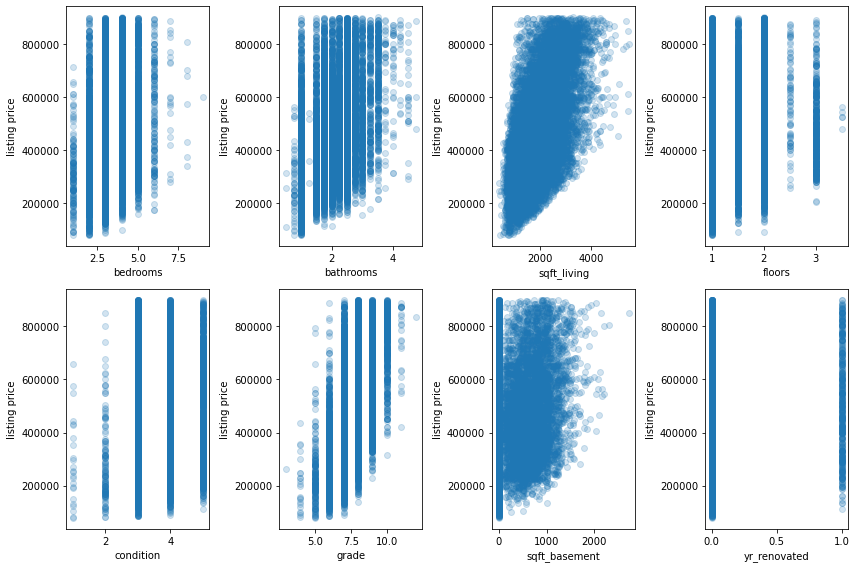

In [1259]:
scatterplot_data = x_train_numeric

fig, axes = plt.subplots(ncols=4, nrows=2, figsize=(12, 8))
fig.set_tight_layout(True)

for index, col in enumerate(scatterplot_data.columns):
    ax = axes[index//4][index%4]
    ax.scatter(x_train_numeric[col], y_train, alpha=0.2)
    ax.set_xlabel(col)
    ax.set_ylabel("listing price")

I will create my second model based on these variables.

In [1260]:
x_train_second_model = x_train_numeric.copy()

x_train_second_model

,bedrooms,bathrooms,sqft_living,floors,condition,grade,sqft_basement,yr_renovated
11634,3,1.75,2840,1.0,4,7,1420.0,0.0
8369,3,2.25,1760,2.0,3,7,0.0,0.0
18349,4,2.50,2980,2.0,3,9,0.0,0.0
1997,4,2.50,2460,2.0,3,9,0.0,0.0
15899,3,1.50,1400,1.0,4,6,0.0,0.0
...,...,...,...,...,...,...,...,...
12435,4,1.00,1530,2.0,3,7,0.0,0.0
13164,3,3.50,1700,2.0,3,8,440.0,0.0
5954,2,1.00,990,1.0,3,7,0.0,0.0
953,4,2.50,3130,2.0,3,10,0.0,0.0


In [1261]:
second_model = LinearRegression()

second_model_scores = cross_validate(
    estimator=second_model,
    X=x_train_second_model,
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Current Model")
print("Train score:     ", second_model_scores["train_score"].mean())
print("Validation score:", second_model_scores["test_score"].mean())
print()
print("Baseline Model")
print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Current Model
Train score:      0.4383561337187869
Validation score: 0.43547593867585793

Baseline Model
Train score:      0.348221922537774
Validation score: 0.34725844789868754


This model performed much better than our original model.

In [1262]:
import statsmodels.api as sm

sm.OLS(y_train, sm.add_constant(x_train_second_model)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.438
Model:                            OLS   Adj. R-squared:                  0.437
Method:                 Least Squares   F-statistic:                     1423.
Date:                Thu, 19 Aug 2021   Prob (F-statistic):               0.00
Time:                        21:16:50   Log-Likelihood:            -1.9360e+05
No. Observations:               14631   AIC:                         3.872e+05
Df Residuals:                   14622   BIC:                         3.873e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -3.787e+05    1.3e+04    -29.049      0.000   -4.04e+05   -3.53e+05
bedrooms      -1.087e+04   1666.085     -6.525      0.000   -1.41e+04   -7604.977
bathrooms     -1.877e+04   2601.505     -7.213      0.000   -2.39e+04   -1.37e+04
sqft_living      80.7346      2.914     27.706      0.000      75.023      86.446
floors         2.487e+04   2849.200      8.730      0.000    1.93e+04    3.05e+04
condition      3.656e+04   1811.392     20.185      0.000     3.3e+04    4.01e+04
grade          7.711e+04   1704.960     45.227      0.000    7.38e+04    8.05e+04
sqft_basement    45.8181      3.568     12.842      0.000      38.825      52.811
yr_renovated    8.61e+04   6740.066     12.774      0.000    7.29e+04    9.93e+04
==============================================================================
Omnibus:                      363.196   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              390.576
Skew:                           0.400   Prob(JB):                     1.54e-85
Kurtosis:                       3.006   Cond. No.                     2.44e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.44e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### All Possible Models

In [1263]:
from itertools import combinations

features = ["sqft_living", "floors", "condition", "sqft_basement","grade", "yr_renovated"]

# Make a dataframe to hold the results
results_df = pd.DataFrame(columns=features)

# Selecting just living_sqft
results_df = results_df.append({
    "train_score": baseline_scores["train_score"].mean(),
    "val_score": baseline_scores["test_score"].mean()
}, ignore_index=True)

# Selecting 1 additional feature
for feature in features[1:]:
    scores = cross_validate(
        estimator=second_model,
        X=x_train[["sqft_living", feature]],
        y=y_train,
        return_train_score=True,
        cv=splitter
    )
    results_df = results_df.append({
        feature: "Yes",
        "train_score": scores["train_score"].mean(),
        "val_score": scores["test_score"].mean()
    }, ignore_index=True)
    
# Selecting 2 additional features
for (feature1, feature2) in list(combinations(features[1:], 2)):
    scores = cross_validate(
        estimator=second_model,
        X=x_train[["sqft_living", feature1, feature2]],
        y=y_train,
        return_train_score=True,
        cv=splitter
    )
    results_df = results_df.append({
        feature1: "Yes",
        feature2: "Yes",
        "train_score": scores["train_score"].mean(),
        "val_score": scores["test_score"].mean()
    }, ignore_index=True)
    
 # Selecting 3 additional features
for (feature1, feature2, feature3) in list(combinations(features[1:], 3)):
    scores = cross_validate(
        estimator=second_model,
        X=x_train[["sqft_living", feature1, feature2, feature3]],
        y=y_train,
        return_train_score=True,
        cv=splitter
    )
    results_df = results_df.append({
        feature1: "Yes",
        feature2: "Yes",
        feature3: "Yes",
        "train_score": scores["train_score"].mean(),
        "val_score": scores["test_score"].mean()
    }, ignore_index=True)   
    
 # Selecting 4 additional features
for (feature1, feature2, feature3, feature4) in list(combinations(features[1:], 4)):
    scores = cross_validate(
        estimator=second_model,
        X=x_train[["sqft_living", feature1, feature2, feature3, feature4]],
        y=y_train,
        return_train_score=True,
        cv=splitter
    )
    results_df = results_df.append({
        feature1: "Yes",
        feature2: "Yes",
        feature3: "Yes",
        feature4: "Yes",
        "train_score": scores["train_score"].mean(),
        "val_score": scores["test_score"].mean()
    }, ignore_index=True) 
    
# Including all 5 additional features
results_df = results_df.append({
    "floors": "Yes", "condition": "Yes", "sqft_basement": "Yes", "grade": "Yes", "yr_renovated": "Yes",
    "train_score": second_model_scores["train_score"].mean(),
    "val_score": second_model_scores["test_score"].mean()
}, ignore_index=True)

# Fill in remaining values where appropriate
results_df["sqft_living"] = "Yes"
results_df.fillna("No", inplace=True)

results_df

,sqft_living,floors,condition,sqft_basement,grade,yr_renovated,train_score,val_score
0,Yes,No,No,No,No,No,0.348222,0.347258
1,Yes,Yes,No,No,No,No,0.336190,0.330531
2,Yes,No,Yes,No,No,No,0.337484,0.329929
3,Yes,No,No,Yes,No,No,0.331376,0.323988
4,Yes,No,No,No,Yes,No,0.406361,0.402739
5,Yes,No,No,No,No,Yes,0.335379,0.327751
6,Yes,Yes,Yes,No,No,No,0.346275,0.340939
7,Yes,Yes,No,Yes,No,No,0.337974,0.332202
8,Yes,Yes,No,No,Yes,No,0.406790,0.402928
9,Yes,Yes,No,No,No,Yes,0.340353,0.334401


In [1264]:
results_df.max()

sqft_living           Yes
floors                Yes
condition             Yes
sqft_basement         Yes
grade                 Yes
yr_renovated          Yes
train_score      0.438356
val_score        0.435476
dtype: object

This matrix shows that our second model with all of our inputs is the best model that we can make.

In [1265]:
best_features = ['sqft_living','bedrooms','condition','sqft_basement','grade','yr_renovated']

In [1266]:
x_train_final = x_train[best_features]
x_test_final = x_test[best_features]

In [1267]:
final_model = LinearRegression()

final_model.fit(x_train_final,y_train)
final_model.score(x_test_final,y_test)

0.4306484630788998

# Section 5: User Friendly Metrics

In [1268]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, final_model.predict(x_test_final), squared=False)

134729.83474059208

In [1269]:
print(pd.Series(final_model.coef_, index=x_train_final.columns, name="Coefficients"))
print()
print("Intercept:", final_model.intercept_)

sqft_living         78.100676
bedrooms        -12871.421189
condition        34851.269646
sqft_basement       32.418549
grade            77410.100618
yr_renovated     85247.118103
Name: Coefficients, dtype: float64

Intercept: -361472.74987670715


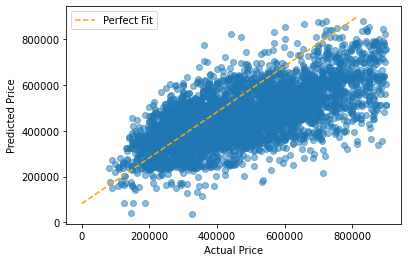

In [1270]:
preds = final_model.predict(x_test_final)
fig, ax = plt.subplots()

perfect_line = np.arange(y_test.min(), y_test.max())
ax.plot(perfect_line, linestyle="--", color="orange", label="Perfect Fit")
ax.scatter(y_test, preds, alpha=0.5)
ax.set_xlabel("Actual Price")
ax.set_ylabel("Predicted Price")
ax.legend();

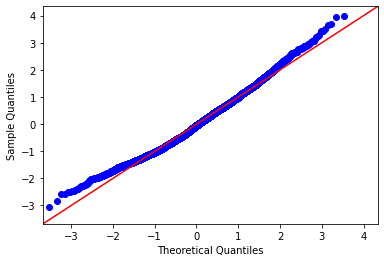

In [1271]:
import scipy.stats as stats
residuals = (y_test - preds)
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True);

In [1272]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(x_train_final.values, i) for i in range(x_train_final.shape[1])]
pd.Series(vif, index=x_train_final.columns, name="Variance Inflation Factor")

sqft_living      20.005529
bedrooms         22.531664
condition        20.949666
sqft_basement     1.815117
grade            42.106335
yr_renovated      1.028611
Name: Variance Inflation Factor, dtype: float64

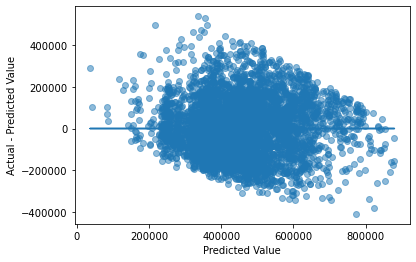

In [1273]:
fig, ax = plt.subplots()

ax.scatter(preds, residuals, alpha=0.5)
ax.plot(preds, [0 for i in range(len(x_test))])
ax.set_xlabel("Predicted Value")
ax.set_ylabel("Actual - Predicted Value");